In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
cd drive/My Drive/DL_3/

[Errno 2] No such file or directory: 'drive/My Drive/DL_3/'
/content/drive/My Drive/DL_3


In [0]:
!pip install tensorboardx

In [0]:
import random
import numpy as np
from itertools import cycle
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets
from torch.autograd import Variable
from torch.utils.data import DataLoader
import h5py
from itertools import cycle
from collections import OrderedDict
from scipy.io import loadmat
import glob
import os

import torch.optim as optim
from torch.autograd import Variable
from tensorboardX import SummaryWriter
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torch.autograd import Variable
from mpl_toolkits.axes_grid1 import ImageGrid
from torchvision.transforms import Compose, ToTensor
from collections import defaultdict

In [0]:
filenames = glob.glob('data/sprites/*.mat')
filenames = sorted(filenames)
split_file = filenames[len(filenames) - 1]
print(split_file)
filenames = filenames[0 : len(filenames) - 2]
print(filenames)

data/sprites/sprites_splits.mat
['data/sprites/sprites_1.mat', 'data/sprites/sprites_10.mat', 'data/sprites/sprites_100.mat', 'data/sprites/sprites_101.mat', 'data/sprites/sprites_102.mat', 'data/sprites/sprites_103.mat', 'data/sprites/sprites_104.mat', 'data/sprites/sprites_105.mat', 'data/sprites/sprites_106.mat', 'data/sprites/sprites_107.mat', 'data/sprites/sprites_108.mat', 'data/sprites/sprites_109.mat', 'data/sprites/sprites_11.mat', 'data/sprites/sprites_110.mat', 'data/sprites/sprites_111.mat', 'data/sprites/sprites_112.mat', 'data/sprites/sprites_113.mat', 'data/sprites/sprites_114.mat', 'data/sprites/sprites_115.mat', 'data/sprites/sprites_116.mat', 'data/sprites/sprites_117.mat', 'data/sprites/sprites_118.mat', 'data/sprites/sprites_119.mat', 'data/sprites/sprites_12.mat', 'data/sprites/sprites_120.mat', 'data/sprites/sprites_121.mat', 'data/sprites/sprites_122.mat', 'data/sprites/sprites_123.mat', 'data/sprites/sprites_124.mat', 'data/sprites/sprites_125.mat', 'data/sprite

In [0]:
print(split_file)
f = loadmat(split_file)
print(f.keys())
print(f['trainidx'][0])
print(f['testidx'][0])
print(f['validx'][0])
# print(f['sprites'].shape)
# for j in range(0, 21):
#   print(np.shape(f[f.get('sprites')[j][0]].value))


data/sprites/sprites_splits.mat
dict_keys(['__header__', '__version__', '__globals__', 'trainidx', 'validx', 'testidx'])
[585 307  73 253 302 151 304 309 356  43 138 655  34  55 521  27  74 635
 535 203 378 603 391 615 162 240 651 565 548 238 530 228 449 453 589 588
 662  63 261 434 323   5 293 671 290 594 487 436 390 430 445   7 421 601
 165 418 156 341  65 288 239 631 415 439 600  30   4 599 507 197  99 285
 265  50 194 168 661 473 118 255 292 561 396 479  38 173 128 365 260 263
 303  42 660 375  45   2 123 515 140 466 306 108 395 610 526 423 286 311
 222 332 458 355  85  84 636 348  12 334  60 167 654 469 353 584 366 537
 273 191  51 380 464 182 236 638 478 106 448 193 329 634 427 568 642 127
 373 299 231 556 511  17 320 300 150 119 101 160 516 284 597 125 153  69
 455 361 113 294 649 251  59 428 116 518 374 347 322 219 146 574 539 117
 215 500 243  49  61 522 248 462 553 287 226 604 555 491 534  53 621 490
 609  16 482 210 121 399 339 503 571 135 653  31 550 499 314 641  64 527
 57

In [0]:
train_dict = defaultdict()
train_dict = { i : 1 for i in f['trainidx'][0]}
print(train_dict)
test_dict = defaultdict()
test_dict = {i : 1 for i in f['testidx'][0]}
print(test_dict)
valid_dict = defaultdict()
valid_dict = {i : 1 for i in f['validx'][0]}
print(valid_dict)

{585: 1, 307: 1, 73: 1, 253: 1, 302: 1, 151: 1, 304: 1, 309: 1, 356: 1, 43: 1, 138: 1, 655: 1, 34: 1, 55: 1, 521: 1, 27: 1, 74: 1, 635: 1, 535: 1, 203: 1, 378: 1, 603: 1, 391: 1, 615: 1, 162: 1, 240: 1, 651: 1, 565: 1, 548: 1, 238: 1, 530: 1, 228: 1, 449: 1, 453: 1, 589: 1, 588: 1, 662: 1, 63: 1, 261: 1, 434: 1, 323: 1, 5: 1, 293: 1, 671: 1, 290: 1, 594: 1, 487: 1, 436: 1, 390: 1, 430: 1, 445: 1, 7: 1, 421: 1, 601: 1, 165: 1, 418: 1, 156: 1, 341: 1, 65: 1, 288: 1, 239: 1, 631: 1, 415: 1, 439: 1, 600: 1, 30: 1, 4: 1, 599: 1, 507: 1, 197: 1, 99: 1, 285: 1, 265: 1, 50: 1, 194: 1, 168: 1, 661: 1, 473: 1, 118: 1, 255: 1, 292: 1, 561: 1, 396: 1, 479: 1, 38: 1, 173: 1, 128: 1, 365: 1, 260: 1, 263: 1, 303: 1, 42: 1, 660: 1, 375: 1, 45: 1, 2: 1, 123: 1, 515: 1, 140: 1, 466: 1, 306: 1, 108: 1, 395: 1, 610: 1, 526: 1, 423: 1, 286: 1, 311: 1, 222: 1, 332: 1, 458: 1, 355: 1, 85: 1, 84: 1, 636: 1, 348: 1, 12: 1, 334: 1, 60: 1, 167: 1, 654: 1, 469: 1, 353: 1, 584: 1, 366: 1, 537: 1, 273: 1, 191: 1, 5

In [0]:
train_filenames = []
test_filenames = []
valid_filenames = []
file_list = []
c = 0
for i in filenames:
  sts = i[-7: -4]
  # print(str)
  if sts[0] >= 'a' and sts[0] <= 'z':
    # print(str[2:])
    sts = int(sts[2:])
  elif sts[0] == '_':
    # print(str[1:])
    sts = int(sts[1 :])
  else:
    sts = int(sts)
  # print(str)
  file_list.append(sts)

for i in file_list:
  if i in train_dict:
    train_filenames.append(filenames[c])
  elif i in test_dict:
    test_filenames.append(filenames[c])
  elif i in valid_dict:
    valid_filenames.append(filenames[c])
  else:
    print(type(i), type(train_dict[585]))
  c += 1
print(c)
print(len(train_filenames))
print(len(test_filenames))
print(len(valid_filenames))
  

671
499
100
72


In [0]:
def construct_dictionary(filenames):
  num = 0
  data_dict = {}
  for i in filenames:
    f = h5py.File(i, 'r')
    # print(np.shape(f.get('sprites')))
    # arr = np.reshape(f[f.get('sprites')[4][0]].value,(7, 3, 60, 60))
    for j in range(0, 21):
      # print(np.shape(f[f.get('sprites')[j][0]].value))
      k = np.shape(f[f.get('sprites')[j][0]].value)[0]
      arr = np.reshape(f[f.get('sprites')[j][0]].value,(k, 3, 60, 60))
      if num not in data_dict:
        data_dict[num] =  arr
      else:
        arr2 = data_dict[num]
        arr2 = np.concatenate([arr2, arr], 0)
        data_dict[num] = arr2

    num += 1
  return data_dict

In [0]:
data_dict = construct_dictionary(train_filenames[0:100])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  # This is added back by InteractiveShellApp.init_path()


In [0]:
# import pickle
# a_file = open("train_dict.pkl", "wb")
# pickle.dump(data_dict, a_file)

In [0]:
test_data_dict = construct_dictionary(test_filenames)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  # This is added back by InteractiveShellApp.init_path()


In [0]:
print(len(data_dict))
print(len(test_data_dict))

100
100


In [0]:
# import pickle
# a_file = open("test_dict.pkl", "wb")
# pickle.dump(test_data_dict, a_file)

In [0]:
a_file = open("train_dict.pkl", "rb")
data_dict = pickle.load(a_file)

a_file = open("test_dict.pkl", "rb")
test_data_dict = pickle.load(a_file)

In [0]:
# for keys in data_dict:
#   print(np.shape(data_dict[keys]))

In [0]:
import torch
from torch.utils import data

class Dataset():
  'Characterizes a dataset for PyTorch'
  def __init__(self, data_dict, num_samples):
        'Initialization'
        self.data_dict = data_dict
        self.num_samples = num_samples
  def __len__(self):
        'Denotes the total number of samples'
        return self.num_samples

  def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        # key is class
        key = (index // 178)
        # num_img is image number for that class 
        num_img = (index // 100)
        # print(key)
        arr = self.data_dict[key]
        image = arr[num_img]
        label = key
        return image, random.SystemRandom().choice(self.data_dict[key]), label

dataset = Dataset(data_dict, 178 * 100)
loader = cycle(DataLoader(dataset, batch_size=16, shuffle = True, num_workers=0, drop_last=True))
print(dataset.data_dict.keys())

image_batch, image_batch_2, labels_batch = next(loader)
print(labels_batch)

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])
tensor([26, 75, 67, 98,  5, 37, 31, 92, 73, 62, 35, 68, 61, 16, 31, 43])


In [0]:
class test_Dataset():
  'Characterizes a dataset for PyTorch'
  def __init__(self, data_dict, num_samples):
        'Initialization'
        self.data_dict = data_dict
        self.num_samples = num_samples
  def __len__(self):
        'Denotes the total number of samples'
        return self.num_samples

  def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        key = (index // 178) 
        num_img = (index // 100)
        # print(key)
        arr = self.data_dict[key]
        image = arr[num_img]
        label = key
        return image, random.SystemRandom().choice(self.data_dict[key]), label

test_dataset = test_Dataset(test_data_dict, 178 * 100)
test_loader = cycle(DataLoader(test_dataset, batch_size = 8, shuffle = True, num_workers=0, drop_last=True))
print(dataset.data_dict.keys())

image_batch, image_batch_2, labels_batch = next(test_loader)
print(labels_batch)

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])
tensor([30,  7, 50, 78, 25, 50, 92, 54])


In [0]:
class Encoder(nn.Module):
    def __init__(self, style_dim, class_dim):
        super(Encoder, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels= 3, out_channels=16, kernel_size=5, stride=2, padding=1, bias=True)
        self.conv_1_in = nn.InstanceNorm2d(num_features=16, track_running_stats=True)
        self.relu_1 = nn.ReLU(inplace=True)

        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=2, padding=1, bias=True)
        self.conv_2_in = nn.InstanceNorm2d(num_features=32, track_running_stats=True)
        self.relu_2 = nn.ReLU(inplace=True)

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=2, padding=1, bias=True)
        self.conv_3_in = nn.InstanceNorm2d(num_features=64, track_running_stats=True)
        self.relu_3 = nn.ReLU(inplace=True)

        # Style embeddings
        self.style_mu = nn.Linear(in_features= 2304, out_features=style_dim, bias=True)
        self.style_logvar = nn.Linear(in_features= 2304, out_features=style_dim, bias=True)

        # Class embeddings
        self.class_output = nn.Linear(in_features=2304, out_features=class_dim, bias=True)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv_1_in(x)
        x = self.relu_1(x)
        x = self.conv2(x)
        x = self.conv_2_in(x)
        x = self.relu_2(x)
        x = self.conv3(x)
        x = self.conv_3_in(x)
        x = self.relu_3(x)
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        style_embeddings_mu = self.style_mu(x)
        style_embeddings_logvar = self.style_logvar(x)
        class_embeddings = self.class_output(x)

        return style_embeddings_mu, style_embeddings_logvar, class_embeddings

class Decoder(nn.Module):
    def __init__(self, style_dim, class_dim):
        super(Decoder, self).__init__()

        # Style embeddings input
        self.style_input = nn.Linear(in_features=style_dim, out_features=2304, bias=True)

        # Class embeddings input
        self.class_input = nn.Linear(in_features=class_dim, out_features=2304, bias=True)

        self.deconv1 = nn.ConvTranspose2d(in_channels=128, out_channels=32, kernel_size=4, stride=2, padding=0, bias=True)
        self.deconv1_in = nn.InstanceNorm2d(num_features=32, track_running_stats=True)
        self.deconv1_relu = nn.LeakyReLU(negative_slope=0.2, inplace=True)

        self.deconv2 = nn.ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=4, stride=2, padding=0, bias=True)
        self.deconv2_in = nn.InstanceNorm2d(num_features= 16, track_running_stats=True)
        self.deconv2_relu = nn.LeakyReLU(negative_slope=0.2, inplace=True)

        self.deconv3 = nn.ConvTranspose2d(in_channels=16, out_channels= 3, kernel_size=4, stride=2, padding=1, bias=True)
        self.sigmoid_output = nn.Sigmoid()
       
    def forward(self, style_embeddings, class_embeddings):
        style_embeddings = F.leaky_relu_(self.style_input(style_embeddings), negative_slope=0.2)
        class_embeddings = F.leaky_relu_(self.class_input(class_embeddings), negative_slope=0.2)

        x = torch.cat((style_embeddings, class_embeddings), dim=1)
        x = x.view(x.size(0), 128, 6, 6)
        x = self.deconv1(x)
        x = self.deconv1_in(x)
        x = self.deconv1_relu(x)

        x = self.deconv2(x)
        x = self.deconv2_in(x)
        x = self.deconv2_relu(x)

        x = self.deconv3(x)
        x = self.sigmoid_output(x)

        return x

class Classifier(nn.Module):
    def __init__(self, z_dim, num_classes):
        super(Classifier, self).__init__()

        self.fc_model = nn.Sequential(OrderedDict([
            ('fc_1', nn.Linear(in_features=z_dim, out_features=256, bias=True)),
            ('fc_1_bn', nn.BatchNorm1d(num_features=256)),
            ('LeakyRelu_1', nn.LeakyReLU(negative_slope=0.2, inplace=True)),

            ('fc_2', nn.Linear(in_features=256, out_features=256, bias=True)),
            ('fc_2_bn', nn.BatchNorm1d(num_features=256)),
            ('LeakyRelu_2', nn.LeakyReLU(negative_slope=0.2, inplace=True)),

            ('fc_3', nn.Linear(in_features=256, out_features=num_classes, bias=True))
        ]))

    def forward(self, z):
        x = self.fc_model(z)

        return x

In [0]:
class ags():
  def __init__(self):
 
# add arguments
  
    self.cuda = True
    self.batch_size = 16
    self.num_channels = 3
    self.initial_learning_rate = 0.0001
    self.style_dim = 64
    self.class_dim = 64
    self.num_classes = 100
    self.reconstruction_coef = 2
    self.reverse_cycle_coef = 10.
    self.kl_divergence_coef = 3.
    self.beta_1 = 0.9
    self.beta_2 = 0.999
    self.log_file = 'log.txt'
    self.image_size = 60
    self.load_saved = False
    self.encoder_save = 'encoder'
    self.decoder_save = 'decoder'
    self.start_epoch = 0
    self.end_epoch = 1

FLAGS = ags()

In [0]:
transform_config = Compose([ToTensor()])


def mse_loss(input, target):
    return torch.sum((input - target).pow(2)) / input.data.nelement()


def l1_loss(input, target):
    return torch.sum(torch.abs(input - target)) / input.data.nelement()


def reparameterize(training, mu, logvar):
    if training:
        std = logvar.mul(0.5).exp_()
        eps = Variable(std.data.new(std.size()).normal_())
        return eps.mul(std).add_(mu)
    else:
        return mu


def weights_init(layer):
    if isinstance(layer, nn.Conv2d):
        layer.weight.data.normal_(0.0, 0.05)
        layer.bias.data.zero_()
    elif isinstance(layer, nn.BatchNorm2d):
        layer.weight.data.normal_(1.0, 0.02)
        layer.bias.data.zero_()
    elif isinstance(layer, nn.Linear):
        layer.weight.data.normal_(0.0, 0.05)
        layer.bias.data.zero_()


**For classification**

In [0]:
def train2(FLAGS):
    """
    model definition
    """
    encoder = Encoder(style_dim=FLAGS.style_dim, class_dim=FLAGS.class_dim)
    encoder.apply(weights_init)
    

    decoder = Decoder(style_dim=FLAGS.style_dim, class_dim=FLAGS.class_dim)
    decoder.apply(weights_init)

    
    # load saved models if load_saved flag is true
    if FLAGS.load_saved:
        encoder.load_state_dict(torch.load(os.path.join('checkpoints', FLAGS.encoder_save)))
        decoder.load_state_dict(torch.load(os.path.join('checkpoints', FLAGS.decoder_save)))

    """
    variable definition
    """

    X_1 = torch.FloatTensor(FLAGS.batch_size, FLAGS.num_channels, FLAGS.image_size, FLAGS.image_size)
    X_2 = torch.FloatTensor(FLAGS.batch_size, FLAGS.num_channels, FLAGS.image_size, FLAGS.image_size)
    X_3 = torch.FloatTensor(FLAGS.batch_size, FLAGS.num_channels, FLAGS.image_size, FLAGS.image_size)

    style_latent_space = torch.FloatTensor(FLAGS.batch_size, FLAGS.style_dim)

    """
    loss definitions
    """
    cross_entropy_loss = nn.CrossEntropyLoss()

    '''
    add option to run on GPU
    '''
    if FLAGS.cuda:
        encoder.cuda()
        decoder.cuda()

        cross_entropy_loss.cuda()

        X_1 = X_1.cuda()
        X_2 = X_2.cuda()
        X_3 = X_3.cuda()

        style_latent_space = style_latent_space.cuda()

    """
    optimizer and scheduler definition
    """
    auto_encoder_optimizer = optim.Adam(
        list(encoder.parameters()) + list(decoder.parameters()),
        lr=FLAGS.initial_learning_rate,
        betas=(FLAGS.beta_1, FLAGS.beta_2)
    )

    reverse_cycle_optimizer = optim.Adam(
        list(encoder.parameters()),
        lr=FLAGS.initial_learning_rate,
        betas=(FLAGS.beta_1, FLAGS.beta_2)
    )

    # divide the learning rate by a factor of 10 after 80 epochs
    auto_encoder_scheduler = optim.lr_scheduler.StepLR(auto_encoder_optimizer, step_size=80, gamma=0.1)
    reverse_cycle_scheduler = optim.lr_scheduler.StepLR(reverse_cycle_optimizer, step_size=80, gamma=0.1)

    """
    training
    """
    if torch.cuda.is_available() and not FLAGS.cuda:
        print("WARNING: You have a CUDA device, so you should probably run with --cuda")

    if not os.path.exists('checkpoints'):
        os.makedirs('checkpoints')

    if not os.path.exists('reconstructed_images'):
        os.makedirs('reconstructed_images')

    # load_saved is false when training is started from 0th iteration
    if not FLAGS.load_saved:
        with open(FLAGS.log_file, 'w') as log:
            log.write('Epoch\tIteration\tReconstruction_loss\tKL_divergence_loss\tReverse_cycle_loss\n')

    # load data set and create data loader instance
    print('Loading stripes paired dataset...')
    
    loader = cycle(DataLoader(dataset, batch_size=FLAGS.batch_size, shuffle=True, num_workers=0, drop_last=True))

    # initialize summary writer
    writer = SummaryWriter()
    for epoch in range(FLAGS.start_epoch, FLAGS.end_epoch):
        print('')
        # print('Epoch #' + str(epoch) + '..........................................................................')
        print(epoch)
        # update the learning rate scheduler
        auto_encoder_scheduler.step()
        reverse_cycle_scheduler.step()

        for iteration in range(int(len(dataset) / FLAGS.batch_size)):
            # A. run the auto-encoder reconstruction
            image_batch_1, image_batch_2, batch_labels = next(loader)
            auto_encoder_optimizer.zero_grad()
            X_1.copy_(image_batch_1)
            X_2.copy_(image_batch_2)

            style_mu_1, style_logvar_1, class_latent_space_1 = encoder(Variable(X_1))
            style_latent_space_1 = reparameterize(training=True, mu=style_mu_1, logvar=style_logvar_1)

            #
            #
            #
            #
            #
            if epoch == FLAGS.end_epoch - 1:

              if iteration == 0:
                temp_labels = batch_labels
                temp_class_latent_space = class_latent_space_1
                temp_style_latent_space = style_latent_space_1
                true_image_batches = image_batch_1
              else:
                temp_labels = torch.cat((temp_labels, batch_labels))
                temp_class_latent_space = torch.cat((temp_class_latent_space, class_latent_space_1))
                temp_style_latent_space = torch.cat((temp_style_latent_space, style_latent_space_1))
                true_image_batches = torch.cat((true_image_batches, image_batch_1))
            kl_divergence_loss_1 = FLAGS.kl_divergence_coef * (
                - 0.5 * torch.sum(1 + style_logvar_1 - style_mu_1.pow(2) - style_logvar_1.exp())
            )
            kl_divergence_loss_1 /= (FLAGS.batch_size * FLAGS.num_channels * FLAGS.image_size * FLAGS.image_size)
            kl_divergence_loss_1.backward(retain_graph=True)

            style_mu_2, style_logvar_2, class_latent_space_2 = encoder(Variable(X_2))
            style_latent_space_2 = reparameterize(training=True, mu=style_mu_2, logvar=style_logvar_2)

            kl_divergence_loss_2 = FLAGS.kl_divergence_coef * (
                - 0.5 * torch.sum(1 + style_logvar_2 - style_mu_2.pow(2) - style_logvar_2.exp())
            )
            kl_divergence_loss_2 /= (FLAGS.batch_size * FLAGS.num_channels * FLAGS.image_size * FLAGS.image_size)
            kl_divergence_loss_2.backward(retain_graph=True)

            reconstructed_X_1 = decoder(style_latent_space_1, class_latent_space_2)
            reconstructed_X_2 = decoder(style_latent_space_2, class_latent_space_1)

            reconstruction_error_1 = FLAGS.reconstruction_coef * mse_loss(reconstructed_X_1, Variable(X_1))
            reconstruction_error_1.backward(retain_graph=True)

            reconstruction_error_2 = FLAGS.reconstruction_coef * mse_loss(reconstructed_X_2, Variable(X_2))
            reconstruction_error_2.backward()

            reconstruction_error = (reconstruction_error_1 + reconstruction_error_2) / FLAGS.reconstruction_coef
            kl_divergence_error = (kl_divergence_loss_1 + kl_divergence_loss_2) / FLAGS.kl_divergence_coef

            auto_encoder_optimizer.step()

            # B. reverse cycle
            image_batch_1, _, __ = next(loader)
            image_batch_2, _, __ = next(loader)

            reverse_cycle_optimizer.zero_grad()

            X_1.copy_(image_batch_1)
            X_2.copy_(image_batch_2)

            style_latent_space.normal_(0., 1.)

            _, __, class_latent_space_1 = encoder(Variable(X_1))
            _, __, class_latent_space_2 = encoder(Variable(X_2))

            reconstructed_X_1 = decoder(Variable(style_latent_space), class_latent_space_1.detach())
            reconstructed_X_2 = decoder(Variable(style_latent_space), class_latent_space_2.detach())

            style_mu_1, style_logvar_1, _ = encoder(reconstructed_X_1)
            style_latent_space_1 = reparameterize(training=False, mu=style_mu_1, logvar=style_logvar_1)

            style_mu_2, style_logvar_2, _ = encoder(reconstructed_X_2)
            style_latent_space_2 = reparameterize(training=False, mu=style_mu_2, logvar=style_logvar_2)

            reverse_cycle_loss = FLAGS.reverse_cycle_coef * l1_loss(style_latent_space_1, style_latent_space_2)
            reverse_cycle_loss.backward()
            reverse_cycle_loss /= FLAGS.reverse_cycle_coef

            reverse_cycle_optimizer.step()

            if (iteration + 1) % 10 == 0:
                print('')
                print('Epoch #' + str(epoch))
                print('Iteration #' + str(iteration))

                print('')
                print('Reconstruction loss: ' + str(reconstruction_error.data.storage().tolist()[0]))
                print('KL-Divergence loss: ' + str(kl_divergence_error.data.storage().tolist()[0]))
                print('Reverse cycle loss: ' + str(reverse_cycle_loss.data.storage().tolist()[0]))

            # write to log
            with open(FLAGS.log_file, 'a') as log:
                log.write('{0}\t{1}\t{2}\t{3}\t{4}\n'.format(
                    epoch,
                    iteration,
                    reconstruction_error.data.storage().tolist()[0],
                    kl_divergence_error.data.storage().tolist()[0],
                    reverse_cycle_loss.data.storage().tolist()[0]
                ))

            # write to tensorboard
            writer.add_scalar('Reconstruction loss', reconstruction_error.data.storage().tolist()[0],
                              epoch * (int(len(dataset) / FLAGS.batch_size) + 1) + iteration)
            writer.add_scalar('KL-Divergence loss', kl_divergence_error.data.storage().tolist()[0],
                              epoch * (int(len(dataset) / FLAGS.batch_size) + 1) + iteration)
            writer.add_scalar('Reverse cycle loss', reverse_cycle_loss.data.storage().tolist()[0],
                              epoch * (int(len(dataset) / FLAGS.batch_size) + 1) + iteration)

        # save model after every 5 epochs
        if (epoch + 1) % 5 == 0 or (epoch + 1) == FLAGS.end_epoch:
            torch.save(encoder.state_dict(), os.path.join('checkpoints', FLAGS.encoder_save))
            torch.save(decoder.state_dict(), os.path.join('checkpoints', FLAGS.decoder_save))

            """
            save reconstructed images and style swapped image generations to check progress
            """
            image_batch_1, image_batch_2, _ = next(loader)
            image_batch_3, _, __ = next(loader)

            X_1.copy_(image_batch_1)
            X_2.copy_(image_batch_2)
            X_3.copy_(image_batch_3)

            style_mu_1, style_logvar_1, _ = encoder(Variable(X_1))
            _, __, class_latent_space_2 = encoder(Variable(X_2))
            style_mu_3, style_logvar_3, _ = encoder(Variable(X_3))

            style_latent_space_1 = reparameterize(training=False, mu=style_mu_1, logvar=style_logvar_1)
            style_latent_space_3 = reparameterize(training=False, mu=style_mu_3, logvar=style_logvar_3)

            reconstructed_X_1_2 = decoder(style_latent_space_1, class_latent_space_2)
            reconstructed_X_3_2 = decoder(style_latent_space_3, class_latent_space_2)

            # save input image batch
            # image_batch = np.transpose(X_1.cpu().numpy(), (0, 2, 3, 1))
            # # image_batch = np.concatenate((image_batch, image_batch, image_batch), axis=3)
            # imshow_grid(image_batch, name=str(epoch) + '_original', save=True)

            # # save reconstructed batch
            # reconstructed_x = np.transpose(reconstructed_X_1_2.cpu().data.numpy(), (0, 2, 3, 1))
            # # reconstructed_x = np.concatenate((reconstructed_x, reconstructed_x, reconstructed_x), axis=3)
            # imshow_grid(reconstructed_x, name=str(epoch) + '_target', save=True)

            # style_batch = np.transpose(X_3.cpu().numpy(), (0, 2, 3, 1))
            # # style_batch = np.concatenate((style_batch, style_batch, style_batch), axis=3)
            # imshow_grid(style_batch, name=str(epoch) + '_style', save=True)

            # # save style swapped reconstructed batch
            # reconstructed_style = np.transpose(reconstructed_X_3_2.cpu().data.numpy(), (0, 2, 3, 1))
            # # reconstructed_style = np.concatenate((reconstructed_style, reconstructed_style, reconstructed_style), axis=3)
            # imshow_grid(reconstructed_style, name=str(epoch) + '_style_target', save=True)
    return temp_labels, temp_class_latent_space, temp_style_latent_space, true_image_batches

In [0]:
FLAGS.load_saved = True
l, c, s, t = train2(FLAGS)

Loading stripes paired dataset...

0


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)



Epoch #0
Iteration #9

Reconstruction loss: 0.007571715861558914
KL-Divergence loss: 0.0031664378475397825
Reverse cycle loss: 0.009832925163209438

Epoch #0
Iteration #19

Reconstruction loss: 0.007197618018835783
KL-Divergence loss: 0.003046054858714342
Reverse cycle loss: 0.009050116874277592

Epoch #0
Iteration #29

Reconstruction loss: 0.006898627150803804
KL-Divergence loss: 0.0032379920594394207
Reverse cycle loss: 0.012101475149393082

Epoch #0
Iteration #39

Reconstruction loss: 0.008241411298513412
KL-Divergence loss: 0.0033496501855552197
Reverse cycle loss: 0.007629078812897205

Epoch #0
Iteration #49

Reconstruction loss: 0.008001260459423065
KL-Divergence loss: 0.0031605574768036604
Reverse cycle loss: 0.010562594048678875

Epoch #0
Iteration #59

Reconstruction loss: 0.007150294724851847
KL-Divergence loss: 0.0030355770140886307
Reverse cycle loss: 0.010080702602863312

Epoch #0
Iteration #69

Reconstruction loss: 0.006698517594486475
KL-Divergence loss: 0.0031243199482

In [0]:
print(type(l), type(c), type(s), type(t))
print(l.shape, c.shape, s.shape, t.shape)

<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([17792]) torch.Size([17792, 16]) torch.Size([17792, 16]) torch.Size([17792, 3, 60, 60])


In [0]:
torch.save(l, 'l.pt')
torch.save(c, 'c.pt')
torch.save(s, 's.pt')
torch.save(t, 't.pt')

In [0]:
l = torch.load('l.pt')
c = torch.load('c.pt')
s = torch.load('s.pt')
t = torch.load('t.pt')

In [0]:
a = l.shape[0]
b = int(l.shape[0]*0.7)
y_train, y_test = torch.split(l, [b, a - b])
class_train, class_test = torch.split(c, [b, a - b])
style_train, style_test = torch.split(s, [b, a - b])

In [0]:
print(y_train.shape, y_test.shape)
print(class_train.shape, class_test.shape)
print(style_train.shape, style_test.shape)

torch.Size([12454]) torch.Size([5338])
torch.Size([12454, 16]) torch.Size([5338, 16])
torch.Size([12454, 16]) torch.Size([5338, 16])


In [0]:
import sklearn
from sklearn import svm
clf = svm.SVC()
clf.fit(np.array(style_train.detach().cpu()), np.array(y_train.detach().cpu()))
train_pred = clf.predict(np.array(style_train.detach().cpu()))
train_acc = sklearn.metrics.accuracy_score(np.array(y_train.detach().cpu()), train_pred)
print('train acc' + str(train_acc))
pred = clf.predict(np.array(style_test.detach().cpu()))
acc = sklearn.metrics.accuracy_score(np.array(y_test.detach().cpu()), pred)
print('test acc' +str(acc))

train acc0.8120282640115626
test acc0.7349194454852005


In [0]:
print(clf.score(np.array(style_train.detach().cpu()), np.array(y_train.detach().cpu())))

0.8120282640115626


In [0]:
clf2 = svm.SVC()
clf2.fit(np.array(class_train.detach().cpu()), np.array(y_train.detach().cpu()))
train_pred2 = clf2.predict(np.array(class_train.detach().cpu()))
train_acc = sklearn.metrics.accuracy_score(np.array(y_train.detach().cpu()), train_pred)
pred2 = clf2.predict(np.array(class_test.detach().cpu()))
acc2 = sklearn.metrics.accuracy_score(np.array(y_test.detach().cpu()), pred2)
print(acc2)

0.9745222929936306


In [0]:
print(train_acc)

0.8120282640115626


In [0]:
import torch
from torch import nn
import torch.nn.functional as F

X = c.detach().cpu()
y = s.detach().cpu()

In [0]:
def train_prediction(X, y, l):
  model = nn.Sequential(nn.Linear(X.shape[1], X.shape[1]),
                        nn.ReLU(),
                        nn.Linear(X.shape[1], X.shape[1]),
                        nn.ReLU(),
                        nn.Linear(X.shape[1], X.shape[1]),
                        nn.ReLU(),
                        nn.Linear(X.shape[1], y.shape[1]))
  # criterion = nn.MSELoss()
  criterion = nn.L1Loss()
  optimizer = optim.SGD(model.parameters(), lr = l)
  epochs = 100
  model_loss = []
  for e in range(epochs):
    running_loss = 0
    for i in range(X.shape[0]):
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(X[i])
        loss = criterion(output, y[i])
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    model_loss.append(running_loss/ X.shape[0])
    print(e, ' # ',running_loss/X.shape[0])
  return model(X), model_loss

0  #  0.7500725134177489
1  #  0.7464763433050908
2  #  0.7423607594971912
3  #  0.7369207921691155
4  #  0.7308226476023706
5  #  0.7248443696597654
6  #  0.7189698069124074
7  #  0.7142176558587993
8  #  0.7108805031580536
9  #  0.7085401125402933
10  #  0.7067599177477735
11  #  0.7053211728165324
12  #  0.7041359726774894
13  #  0.7031607367056474
14  #  0.7023710067143266
15  #  0.7017330710255029
16  #  0.7012205149032427
17  #  0.7007994879865914
18  #  0.7004425996290834
19  #  0.7001753816628055
20  #  0.6999342144230444
21  #  0.6997092118750462
22  #  0.6995232953524656
23  #  0.6993408180614201
24  #  0.6991896788415949
25  #  0.6990349762660734
26  #  0.6988994869564691
27  #  0.6987902952010712
28  #  0.6986812732134308
29  #  0.6985767805643296
30  #  0.6984832379632117
31  #  0.6983896301929535
32  #  0.6983129520722654
33  #  0.6982396577608384
34  #  0.6981591840599025
35  #  0.6981024589138419
36  #  0.6980338495040542
37  #  0.6979805587926943
38  #  0.6979172754798

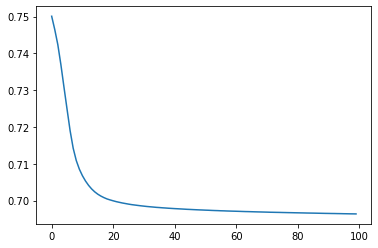

In [0]:
a, loss1 = train_prediction(X, y, 0.01)
import matplotlib.pyplot as plt
plt.plot(loss1)

0  #  0.3118608144072167
1  #  0.24000860629582338
2  #  0.23880285570670046
3  #  0.23824165329127833
4  #  0.2378471333047982
5  #  0.2375174339839749
6  #  0.23720809755156214
7  #  0.23689767093094213
8  #  0.23656195785599143
9  #  0.2361727284292659
10  #  0.23569616006415212
11  #  0.23508766204328013
12  #  0.2343128021781364
13  #  0.23339342082651812
14  #  0.23244481936557573
15  #  0.23163303989875184
16  #  0.23101059181699424
17  #  0.2305011682760682
18  #  0.2300207853105882
19  #  0.2295103184135861
20  #  0.2289298481960896
21  #  0.22824818644965633
22  #  0.2274371699212391
23  #  0.22648657524790825
24  #  0.22542118259234709
25  #  0.22430374279555476
26  #  0.22322907633221384
27  #  0.2222688387259004
28  #  0.22143753016723342
29  #  0.22069224997852627
30  #  0.21998777758957966
31  #  0.21929685447323188
32  #  0.21860412452725714
33  #  0.21790485734057224
34  #  0.21718780596353365
35  #  0.21645127483109913
36  #  0.21569372217495286
37  #  0.2149040688203

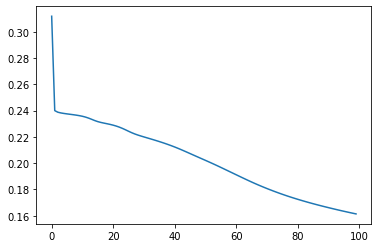

In [0]:
b, loss2 = train_prediction(y, X, 0.001)
plt.plot(loss2)

In [0]:
decoder = Decoder(style_dim=FLAGS.style_dim, class_dim=FLAGS.class_dim)
decoder.load_state_dict(torch.load(os.path.join('checkpoints', FLAGS.decoder_save)))

<All keys matched successfully>

In [0]:
reconstructed_X_1 = decoder(a[:16], b[:16])

In [0]:
print(reconstructed_X_1.shape)

torch.Size([16, 3, 60, 60])


In [0]:
reconstructed_X = np.transpose(reconstructed_X_1.cpu().data.numpy(), (0, 3, 2, 1))

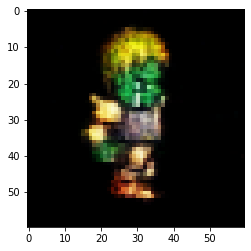

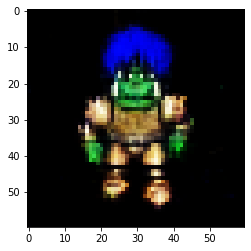

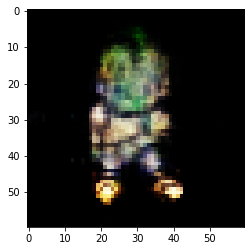

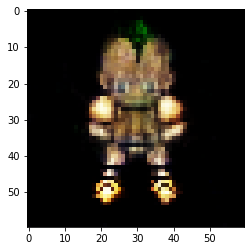

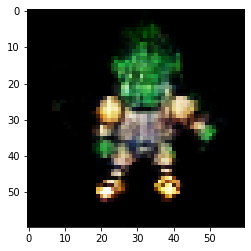

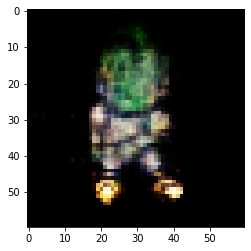

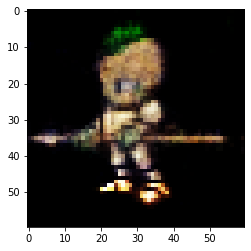

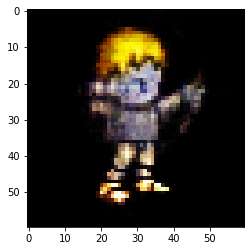

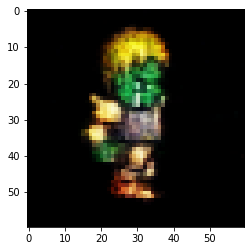

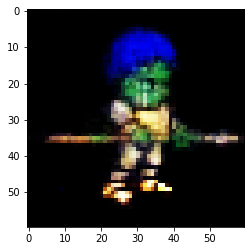

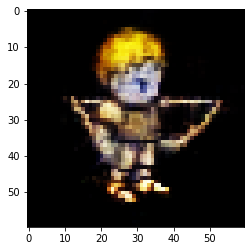

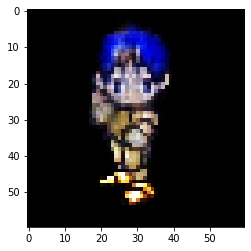

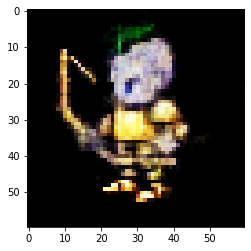

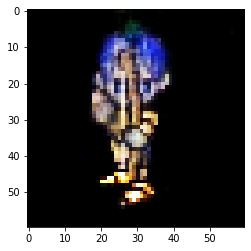

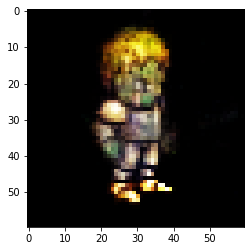

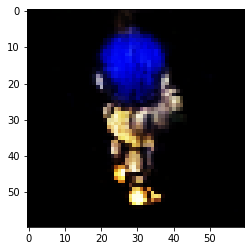

In [0]:
for i in range(16):
  plt.imshow(reconstructed_X[i])
  plt.show()

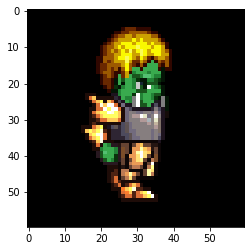

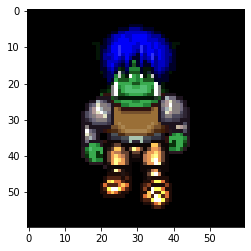

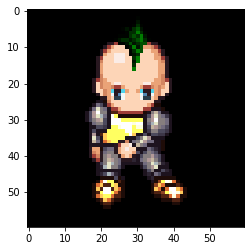

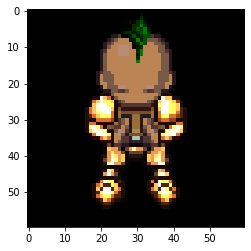

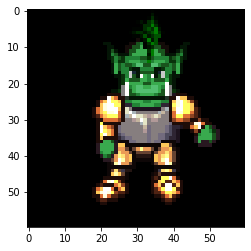

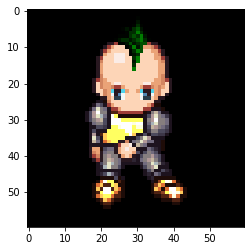

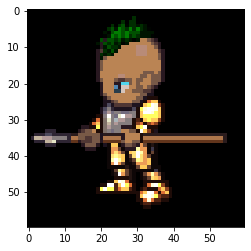

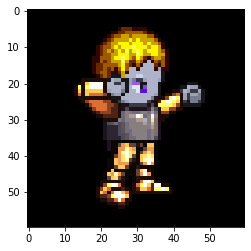

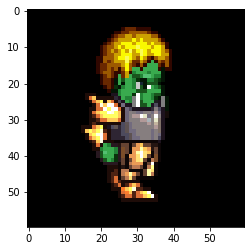

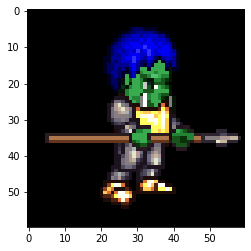

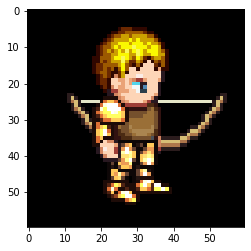

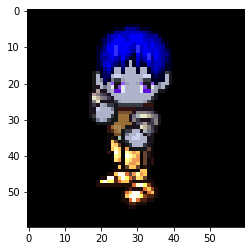

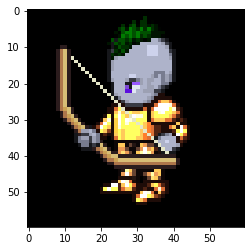

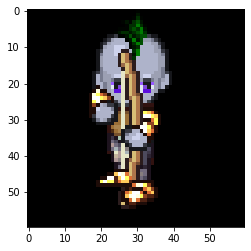

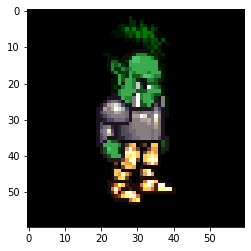

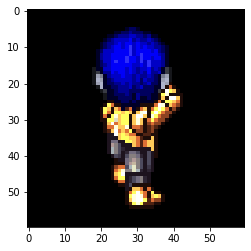

In [0]:
k = np.transpose(t, (0, 3, 2, 1))
for i in range(16):
  plt.imshow(k[i])
  plt.show()

**Style Transfer Grids**

In [0]:
def plot_style_grid_matrix(FLAGS):
  encoder = Encoder(style_dim=FLAGS.style_dim, class_dim=FLAGS.class_dim)
  decoder = Decoder(style_dim=FLAGS.style_dim, class_dim=FLAGS.class_dim)
  
  X_1 = torch.FloatTensor(FLAGS.batch_size, FLAGS.num_channels, FLAGS.image_size, FLAGS.image_size)
  X_2 = torch.FloatTensor(FLAGS.batch_size, FLAGS.num_channels, FLAGS.image_size, FLAGS.image_size)
 
  # load saved models if load_saved flag is true
  if FLAGS.load_saved:
      encoder.load_state_dict(torch.load(os.path.join('checkpoints', FLAGS.encoder_save)))
      decoder.load_state_dict(torch.load(os.path.join('checkpoints', FLAGS.decoder_save)))

  if FLAGS.cuda:
        encoder.cuda()
        decoder.cuda()        

        X_1 = X_1.cuda()
        X_2 = X_2.cuda()
        
  
 
  image_batch_1, _, _ = next(test_loader)
  image_batch_2, _, _ = next(test_loader)
  
  
  X_1.copy_(image_batch_1)
  X_2.copy_(image_batch_2)
  

  style_mu_1, style_logvar_1, _ = encoder(Variable(X_1))
  _, __, class_latent_space_2 = encoder(Variable(X_2))
  

  style_latent_space_1 = reparameterize(training=False, mu=style_mu_1, logvar=style_logvar_1)
 
  # print(np.array(style_latent_space_1.detach().cpu()).shape, np.array(class_latent_space_2.detach().cpu()).shape)
  style_latent_nparray = np.array(style_latent_space_1.detach().cpu())
  # print(arr[0] == arr[1], arr[0] == arr[2])

  # reconstructed_X_1_2 = decoder(style_latent_space_1, class_latent_space_2)
  # reconstructed_X_3_2 = decoder(style_latent_space_3, class_latent_space_2)
  k = style_latent_nparray.shape[0]
  reconstructed_images = np.zeros((k, 60, 60, 3))
  for i in range(0, k):
    style_latent_temp = np.zeros((k, FLAGS.style_dim),dtype = 'float32')
    for j in range(0, k):
      style_latent_temp[j] = style_latent_nparray[i]

    
    if FLAGS.cuda:
      style_latent_temp = torch.from_numpy(style_latent_temp)
      style_latent_temp = style_latent_temp.cuda()
    reconstructed_x = decoder(style_latent_temp, class_latent_space_2)
    reconstructed_xx = np.transpose(reconstructed_x.cpu().data.numpy(), (0, 3, 2, 1))
    if i == 0:
      reconstructed_images = np.copy(reconstructed_xx)
    else:
      reconstructed_images = np.concatenate([reconstructed_images, reconstructed_xx], 0)
  
  image_batch_2 = np.array(image_batch_2)
  print(type(image_batch_2))
  image_batch_2 = np.transpose(image_batch_2, (0, 3, 2, 1))
  reconstructed_images = np.concatenate([image_batch_2, reconstructed_images], 0)
  print(reconstructed_images.shape)
  image_batch_1 = np.transpose(image_batch_1.numpy(), (0, 3, 2, 1))
  blank_img = np.zeros((60, 60, 3))
  image_list = []
  image_list.append(blank_img)
  j = 0
  for i in range(reconstructed_images.shape[0]):
    if i % 8 == 0 and j != 8 and i != 0:
      image_list.append(image_batch_1[j])
      
      j += 1
    image_list.append(reconstructed_images[i])
  print(len(image_list))
  fig = plt.figure(figsize=(12., 12.))
  grid = ImageGrid(fig, 111,  # similar to subplot(111)
                  nrows_ncols=(9, 9),  # creates 2x2 grid of axes
                  axes_pad=0.01,  # pad between axes in inch.
                  )
  # print(label1)
  for ax, im in zip(grid, image_list):
      # Iterating over the grid returns the Axes.
      ax.imshow(im)

  plt.show()


<class 'numpy.ndarray'>
(72, 60, 60, 3)
81


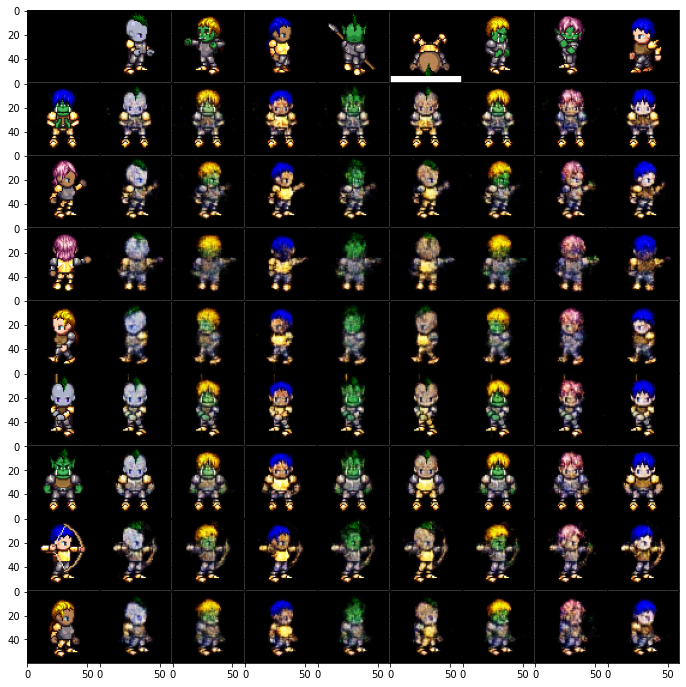

In [0]:
F2 = ags()
F2.load_saved = True
F2.batch_size = 8
plot_style_grid_matrix(F2)

In [0]:
def linear_interpolation_line(FLAGS):
  encoder = Encoder(style_dim=FLAGS.style_dim, class_dim=FLAGS.class_dim)   
  decoder = Decoder(style_dim=FLAGS.style_dim, class_dim=FLAGS.class_dim)
  
  X_1 = torch.FloatTensor(FLAGS.batch_size, FLAGS.num_channels, FLAGS.image_size, FLAGS.image_size)
  X_2 = torch.FloatTensor(FLAGS.batch_size, FLAGS.num_channels, FLAGS.image_size, FLAGS.image_size)
 
  # load saved models if load_saved flag is true
  if FLAGS.load_saved:
      encoder.load_state_dict(torch.load(os.path.join('checkpoints', FLAGS.encoder_save)))
      decoder.load_state_dict(torch.load(os.path.join('checkpoints', FLAGS.decoder_save)))
 
  if FLAGS.cuda:
        encoder.cuda()
        decoder.cuda()
        X_1 = X_1.cuda()
        X_2 = X_2.cuda() 
  image_batch_1, _ ,_  = next(test_loader)
  image_batch_2, _, _ = next(test_loader)
  
  X_1.copy_(image_batch_1)
  X_2.copy_(image_batch_2)

  style_mu_1, style_logvar_1, class_latent_space_1 = encoder(Variable(X_1))
  style_mu_2, style_logvar_2, class_latent_space_2 = encoder(Variable(X_2))
  
  style_latent_space_1 = reparameterize(training= False, mu = style_mu_1, logvar = style_logvar_1)
  style_latent_space_2 = reparameterize(training = False, mu = style_mu_2, logvar = style_logvar_2)
  image_batch_1 = np.transpose(image_batch_1.numpy(), (0, 3, 2, 1))
  image_batch_2 = np.transpose(image_batch_2.numpy(), (0, 3, 2, 1))
  style_latent_nparray1 = np.array(style_latent_space_1.detach().cpu())
  style_latent_nparray2 = np.array(style_latent_space_2.detach().cpu())
  class_latent_nparray2 = np.array(class_latent_space_2.detach().cpu())
  class_latent_nparray1 = np.array(class_latent_space_1.detach().cpu())
  reconstructed_images = np.zeros((8, 8, 60, 60, 3), dtype = 'float32')
  class_latent_spaces = np.zeros((8, 8, 1, 64), dtype = 'float32')
  style_latent_spaces = np.zeros((8, 8, 1, 64), dtype = 'float32')
  steps = 8
  for k in range(8):
    new_class_latent_space = (class_latent_nparray2 - class_latent_nparray1) *  k / steps + class_latent_nparray1
    style_latent_spaces[0][k] = style_latent_nparray1
    class_latent_spaces[0][k] = new_class_latent_space
    # x = torch.from_numpy(new_class_latent_space)
    # class_latent_space = x.cuda()

    
    # recons = decoder(style_latent_space_1, class_latent_space)
    # print(recons)
    # reconstructed_images[k] = np.transpose(recons.detach().cpu().data.numpy(), (0, 3, 2, 1))[0]
  for k in range(7, -1, -1):
    new_class_spaces = (class_latent_nparray1 - class_latent_nparray2) * (7 - k)/steps + class_latent_nparray2
    style_latent_spaces[7][k] = style_latent_nparray2
    class_latent_spaces[7][k] = new_class_spaces
  steps = 6
  for k in range(0, 8):
    for j in range(1, 7):
      new_style_spaces = (style_latent_spaces[7][k] - style_latent_spaces[0][k])  * j / steps + style_latent_spaces[0][k]
      style_latent_spaces[j][k] = new_style_spaces
      class_latent_spaces[j][k] = class_latent_spaces[j][7]
  for j in range(0, 8):
    for k in range(0, 8):
      # print(np.shape(style_latent_spaces[j][k]))
      stl = torch.from_numpy(style_latent_spaces[j][k])
      cls = torch.from_numpy(class_latent_spaces[j][k])
      stl = stl.cuda()
      cls = cls.cuda()
      img = decoder(stl, cls)
      reconstructed_images[j][k] = np.transpose(img.detach().cpu().data.numpy(), (0, 3, 2, 1))[0]
      # print(np.shape(reconstructed_images[j][k]))
  # print(np.shape(image_batch_1[0]))
  reconstructed_images[0][0] = image_batch_1[0]
  reconstructed_images[7][7] = image_batch_2[0]


  image_list = []
  
  for i in range(reconstructed_images.shape[0]):
    for j in range(reconstructed_images.shape[1]):
      image_list.append(reconstructed_images[i][j])
    
  # print(len(image_list))
  fig = plt.figure(figsize=(10., 10.))
  grid = ImageGrid(fig, 111,  # similar to subplot(111)
                  nrows_ncols=(8, 8),  # creates 2x2 grid of axes
                  axes_pad=0.01,  # pad between axes in inch.
                  )
  # print(label1)
  for ax, im in zip(grid, image_list):
      # Iterating over the grid returns the Axes.
      ax.imshow(im)

  plt.show()

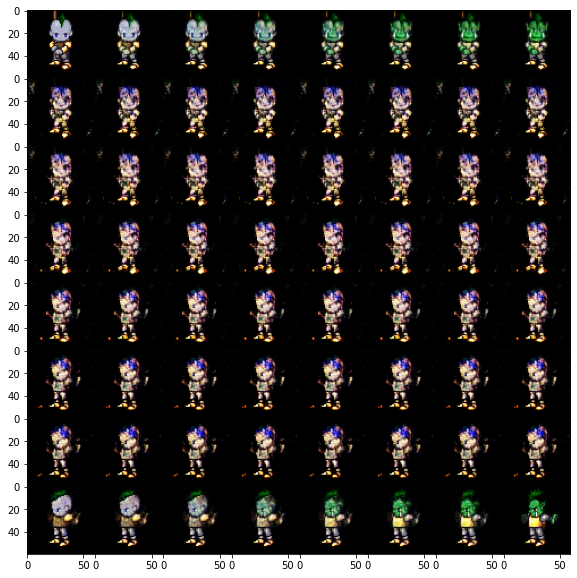

In [0]:
F1 = ags()
F1.load_saved = True
F1.batch_size = 1
linear_interpolation_line(F1)